# 시계열분석

# 3장. Error Trend Seasonality (ETS)
- 데이터의 패턴을 더 잘 파악하기 위해서 또는 예측을 수행하기 위해 Smoothing을 한다.
- Smoothing 위해서 Error, Trend, Seasonality 요소를 활용하는데 각각을 더하거나 곱하여 Smoothing을 한다.
- 이것들을 가지고 시계열 데이터 모델링 할 수 있다.

시계열데이터 특정시점 y_t = Level(Cyclical) + Trend Seasonality + Noise (Error)로 이루어져있음.


근데, Level은 decomposition 할수없어서 Noise로 들어감

즉, y_t = Trend + Seasonality + Error => ETS

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
---

## 01. decomposition

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# 상향 트렌드만 가지고 있는 데이터 (additive 모딜)
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

In [8]:
# additive(더하기) 모델 decomposition
result = seasonal_decompose(series, model='additive', period=1)

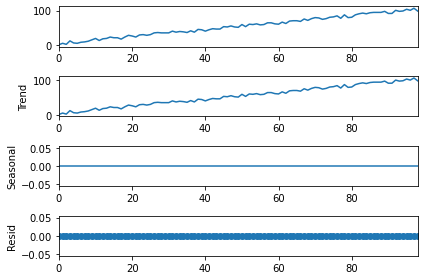

In [9]:
# plot으로 확인 (주의 ; 안붙이면 두개나옴)
result.plot();

In [10]:
# 시각화 함수 만들기
def plot_decompose(decomposeresult):
    f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

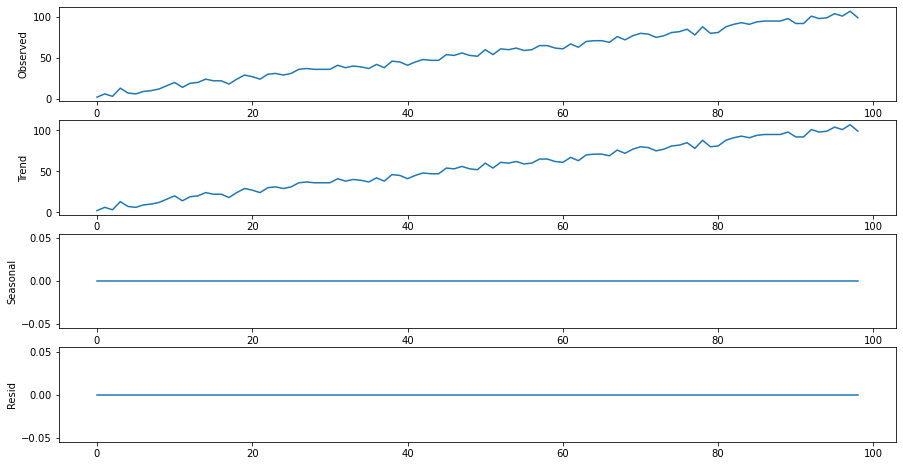

In [11]:
plot_decompose(result)

- 곱하기 모델
    - y_t = Level * Error * Trend * Seasonality

- 사실 더하기 모델이랑 별다른 차이없음 로그씌어주면 +가 되기 때문
    - log(y_t) = Level + Error + Trend + Seasonality

<AxesSubplot:>

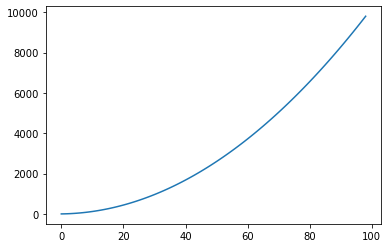

In [2]:
# multiplicative(곱하기)모델 만들기
series = pd.Series([i**2 for i in range(1,100)])
series.plot()

In [12]:
# decomposition
result = seasonal_decompose(series, model='multiplicative', period=1)

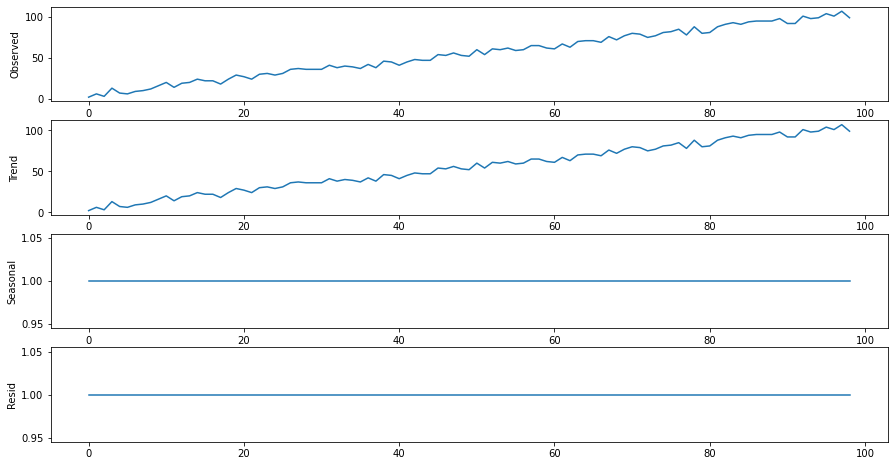

In [13]:
# 시각화
plot_decompose(result)

---

## 02. 실습

In [52]:
# 데이터불러오기
airline = pd.read_csv('./data/airline_passengers.csv', index_col = 'Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


<AxesSubplot:xlabel='Month'>

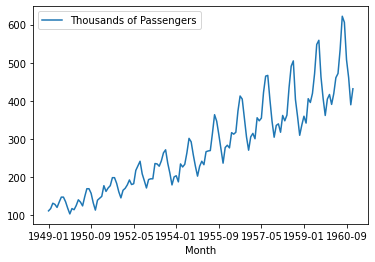

In [53]:
airline.plot()

In [54]:
# 인덱스 타입 datetime으로 바꾸기 => 원래 day값은 없지만 default로 매월 1일로 채워넣게됨
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [55]:
# decompose
result = \
seasonal_decompose(airline['Thousands of Passengers'],
                  model = 'multiplicative')

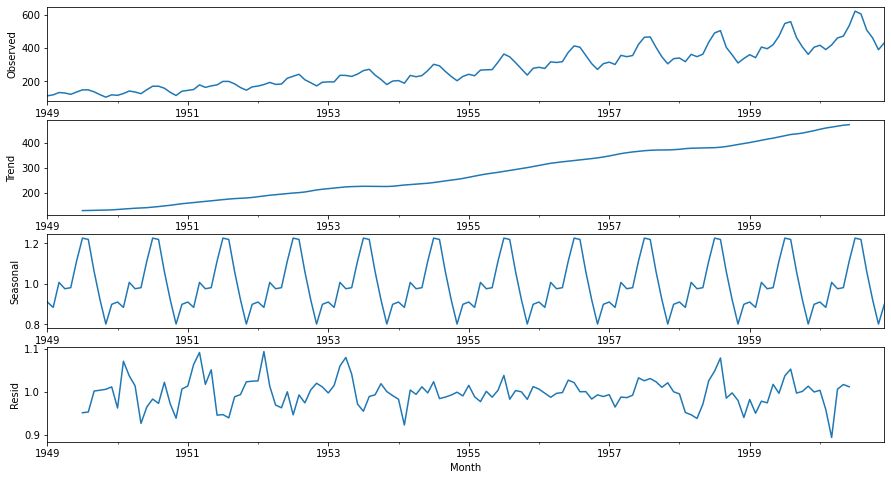

In [56]:
# 시각화
plot_decompose(result)
## 지금 육안으로는 Resid에서 패턴을 찾기 힘들다.